In [112]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\Titanic_train.csv')
test_data = pd.read_csv('C:\\Users\\DELL\\Downloads\\DATASCIENCE ASSIGNMENTS\\Titanic_test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Exploratory Data Analysis (EDA):

In [8]:
# checking missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

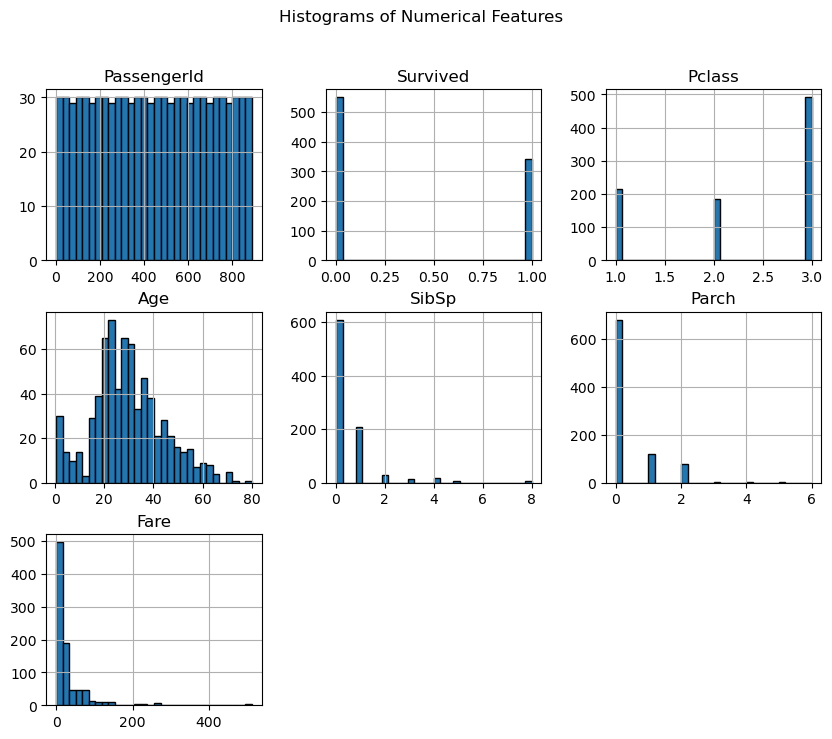

In [10]:
#HISTOGRAM for train_data
train_data.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


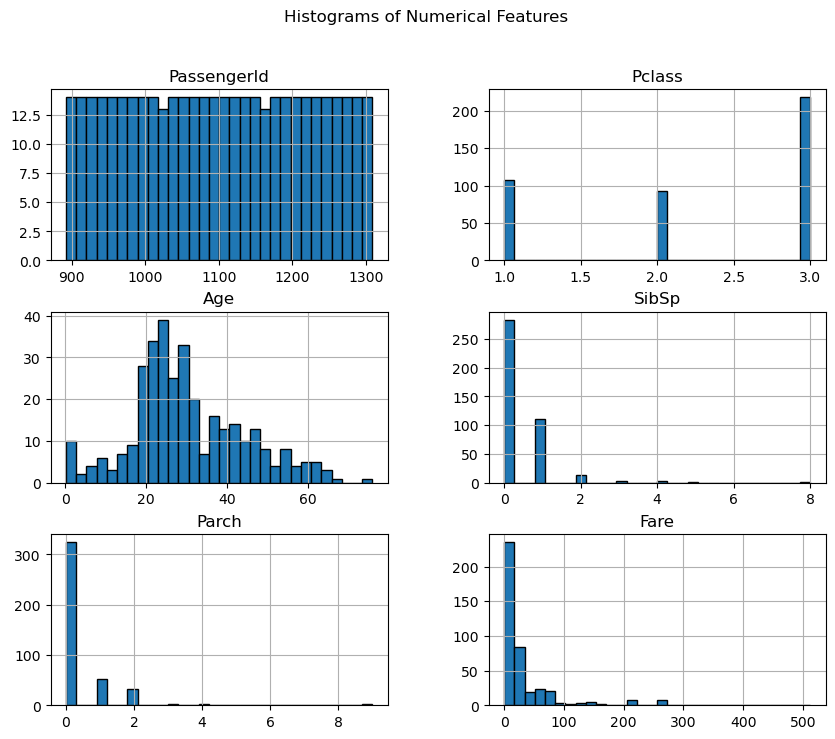

In [11]:
#HISTOGRAM for test_data
test_data.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


<Axes: >

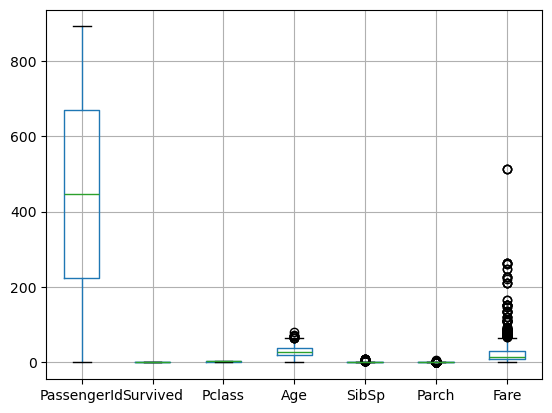

In [23]:
#BOX PLOT FOR train_data
train_data.boxplot()

<Axes: >

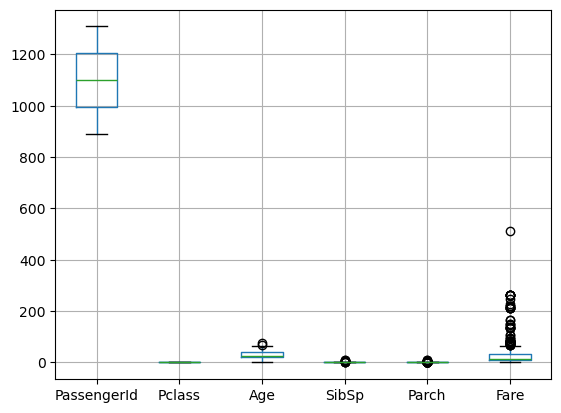

In [38]:
#BOX PLOT FOR test_data
test_data.boxplot()

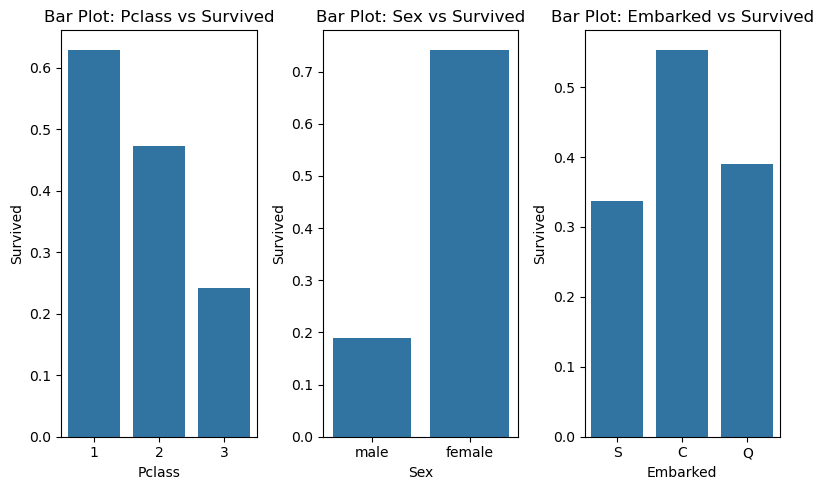

In [27]:
#BAR PLOT for train_data
categorical_features = ['Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(8, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.barplot(x=train_data[feature], y=train_data['Survived'], ci=None)
    plt.title(f'Bar Plot: {feature} vs Survived')
    plt.xlabel(feature)
    plt.ylabel('Survived')
plt.tight_layout()
plt.show()


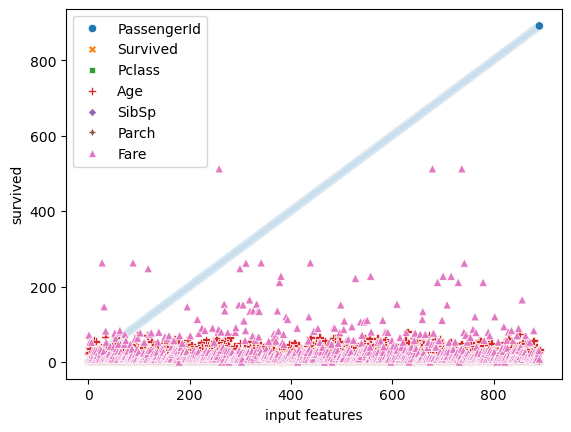

In [29]:
#SCATTER PLOT for train_data
sns.scatterplot(train_data)
plt.xlabel('input features')
plt.ylabel('survived')
plt.show()

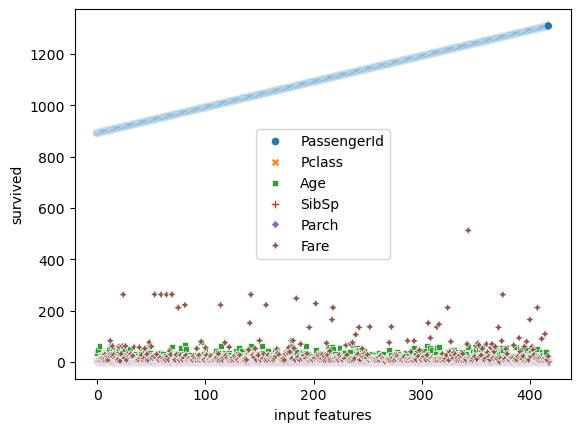

In [42]:
#SCATTER PLOT for test_data
sns.scatterplot(test_data)
plt.xlabel('input features')
plt.ylabel('survived')
plt.show()

# Data Preprocessing:

In [44]:
# IMPUTING
from sklearn.impute import SimpleImputer
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
categorical_cols = test_data.select_dtypes(include=['object']).columns

In [46]:
# Impute numerical columns
num_imputer = SimpleImputer(strategy='median')
train_data[numerical_cols] = num_imputer.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = num_imputer.fit_transform(test_data[numerical_cols])

In [48]:
# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = cat_imputer.fit_transform(test_data[categorical_cols])

In [36]:
train_data.isnull().sum().sum()

0

In [50]:
test_data.isnull().sum().sum()

0

In [129]:
#Encode Categorical Variables
# One-hot encode the categorical variables
train_data = pd.get_dummies(train_data,dtype=int,drop_first=True)
print("Training Data After Encoding:")
train_data.head()



Training Data After Encoding:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,-1.730108,0.0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1.0,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1.0,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.718444,1.0,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.714556,0.0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [131]:
test_data = pd.get_dummies(test_data,dtype=int, drop_first=True)
print("\nTest Data After Encoding:")
test_data.head()


Test Data After Encoding:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_AbbottMrRossmoreEdward,Name_AbbottMrsStantonRosaHunt,Name_AbelsonMrSamuel,...,Cabin_FG63,Cabin_FG73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1.733996,0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0,0,0,...,False,0,False,False,0,False,False,0,True,False
1,1.737884,0,0.827377,1.355510,0.432793,-0.473674,-0.507479,0,0,0,...,False,0,False,False,0,False,False,0,False,True
2,1.741772,0,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0,0,0,...,False,0,False,False,0,False,False,0,True,False
3,1.745659,0,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0,0,0,...,False,0,False,False,0,False,False,0,False,True
4,1.749547,0,0.827377,-0.565736,0.432793,0.767630,-0.401017,0,0,0,...,False,0,False,False,0,False,False,0,False,True


In [68]:
# Ensure that both datasets have the same columns
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)


In [72]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
print("Training Data After Scaling:")
train_data.head()


Training Data After Scaling:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,-1.730108,0.0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1.0,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1.0,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.718444,1.0,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.714556,0.0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [133]:
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])
print("\nTest Data After Scaling:")
test_data.head()



Test Data After Scaling:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_AbbottMrRossmoreEdward,Name_AbbottMrsStantonRosaHunt,Name_AbelsonMrSamuel,...,Cabin_FG63,Cabin_FG73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1.733996,0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0,0,0,...,False,0,False,False,0,False,False,0,True,False
1,1.737884,0,0.827377,1.355510,0.432793,-0.473674,-0.507479,0,0,0,...,False,0,False,False,0,False,False,0,False,True
2,1.741772,0,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0,0,0,...,False,0,False,False,0,False,False,0,True,False
3,1.745659,0,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0,0,0,...,False,0,False,False,0,False,False,0,False,True
4,1.749547,0,0.827377,-0.565736,0.432793,0.767630,-0.401017,0,0,0,...,False,0,False,False,0,False,False,0,False,True


# Building Predictive Models:

In [79]:
from sklearn.model_selection import train_test_split
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [137]:
# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_valid.shape}")

Training set size: (712, 1725)
Validation set size: (179, 1725)


In [139]:
# Replace special characters in the column names
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
X_valid.columns = X_valid.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
test_data.columns = test_data.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

In [195]:
#LGB MODEL
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lgb_model = lgb.LGBMClassifier(n_estimators=150,max_depth=4,max_leaves=4,learning_rate=0.1)
# Train the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=4 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=4 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

LGBMClassifier(max_depth=4, max_leaves=4, n_estimators=150)

In [197]:
y_pred_lgb = lgb_model.predict(X_valid)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=4 will be ignored. Current value: num_leaves=31


In [199]:
# Evaluate the model
lgb_accuracy = accuracy_score(y_valid, y_pred_lgb)
lgb_precision = precision_score(y_valid, y_pred_lgb)
lgb_recall = recall_score(y_valid, y_pred_lgb)
lgb_f1 = f1_score(y_valid, y_pred_lgb)

print(f"LightGBM Accuracy: {lgb_accuracy*100}")
print(f"LightGBM Precision: {lgb_precision*100}")
print(f"LightGBM Recall: {lgb_recall*100}")
print(f"LightGBM F1-Score: {lgb_f1*100}")


LightGBM Accuracy: 78.77094972067039
LightGBM Precision: 76.47058823529412
LightGBM Recall: 70.27027027027027
LightGBM F1-Score: 73.23943661971832


In [207]:
# XGB MODEL
import xgboost as xgb
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=150,max_depth=4,max_leaves=4,learning_rate=0.1)
# Train the model
xgb_model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [209]:
pred_xgb = xgb_model.predict(valid_X)

In [211]:
# Evaluate the model
xgb_accuracy = accuracy_score(valid_y, pred_xgb)
xgb_precision = precision_score(valid_y, pred_xgb)
xgb_recall = recall_score(valid_y, pred_xgb)
xgb_f1 = f1_score(valid_y, pred_xgb)

print(f"XGBoost Accuracy: {xgb_accuracy*100}")
print(f"XGBoost Precision: {xgb_precision*100}")
print(f"XGBoost Recall: {xgb_recall*100}")
print(f"XGBoost F1-Score: {xgb_f1*100}")

XGBoost Accuracy: 81.00558659217877
XGBoost Precision: 81.25
XGBoost Recall: 70.27027027027027
XGBoost F1-Score: 75.36231884057972


# Comparative Analysis:

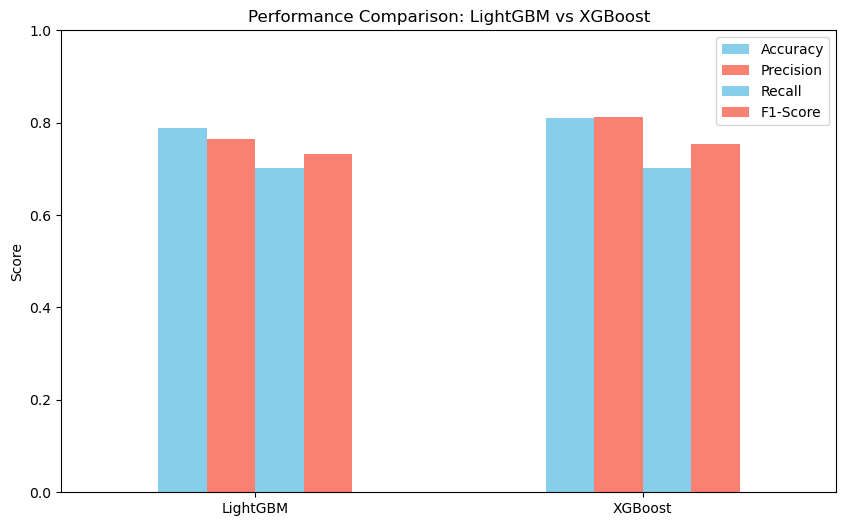

In [187]:
import matplotlib.pyplot as plt
import numpy as np
metrics = {
    'Accuracy': [lgb_accuracy, xgb_accuracy],
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1-Score': [lgb_f1, xgb_f1]}

# Create a bar plot for each metric
metrics_df = pd.DataFrame(metrics, index=['LightGBM', 'XGBoost'])

# Plotting
metrics_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='best')
plt.show()
